<a href="https://colab.research.google.com/github/Hey-0/Text-mining/blob/main/%EB%A9%94%EC%8B%9C%EC%A7%80_%ED%82%A4%EC%9B%8C%EB%93%9C_%EC%B6%94%EC%B6%9C%ED%95%98%EA%B8%B0(%EB%9F%B0%EB%B0%95%ED%86%A1_%EC%9D%B4%ED%9B%84_%EC%88%98%EC%A0%95%EB%B2%84%EC%A0%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **메시지 키워드 추출**



*   [텍스트 마이닝(text mining) 이란](http://bigdata.dongguk.ac.kr/lectures/bigdata/_book/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D%EA%B8%B0%EC%B4%88.html)
  + 텍스트자료로 부터 유용한 정보를 추출하여 분석하기 위한 도구
  + 텍스트 데이터로 부터 의미있는 정보를 이끌어 내는 과정
* 텍스트 마이닝의 분석방법
    + **워드클라우드: 주요 키워드의 추출**
    - 군집분석: 유사 단어들(또는 문서들)간의 군집 분석(커뮤니티 분석)
    - 네트워크분석: 연관 단어의 추출 또는 단어 네트워크 분석
    - 토픽모델(토픽분석, 주제분석) / 토픽 트렌드 분석
    - 이상치 분석 (anormality), 스팸메일 탐지
    - 표절분석: 문서의 유사도 계산
    - 분류(classification): 문서를 미리 정해진 주제에 할당

* [형태소 분석기란](https://mr-doosun.tistory.com/22)
  + 텍스트에서 형태소에 따라 단어로 분리, 명사 추출, 어절 추출 등의 역할
  + 형태소 분석기 KoNLPy 패키지 안에 여러 종류의 형태소 분석기가 있다.
  
---


1.   내용 

*   눔 회원의 메시지 데이터를 가져와서 키워드 추출하기
*   추출한 키워드를 시각화하기


2.   데이터 셋


*   다운로드 위치(구글드라이브): https://drive.google.com/drive/folders/1zVkYfpSlp-M24VE4iXwRvvaXFWbTMm9D















# 1 데이터 준비 



*   '대화로그 데이터(raw)' 파일을 사본을 만들어서 내 드라이브에 저장
*   '메시지 키워드 추출하기' 코랩 문서를 사본을 만들어서 내 드라이브에 저장







# 2 코랩 <> 구글드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3 대화로그 데이터 불러오기 



*   Pandas란?\
Pandas는 파이썬에서 행과 열로 이루어진 데이터를 다루기 위한 데이터분석 라이브러리

In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/메시지 키워드 추출/대화로그데이터(raw).xlsx의 사본")
df

,sender,messaged_time,message
0,user,2021-07-25 00:13:20.088,준비완료
1,user,2021-07-26 15:46:27.165,준비 완료
2,user,2021-07-26 16:36:35.329,오늘은 좀 힘듬다 ㅠㅠ
3,user,2021-07-26 16:53:32.38,지금 해주세요 자전거 탈랬는데 나중에 할께요
4,user,2021-07-26 16:59:06.693,저는 자전거 프라모델 운동화수집 좋아합니다
...,...,...,...
4573,user,2021-12-15 23:49:13.457,몸무게 기록 매일 해보겠습니다
4574,user,2021-12-16 11:24:51.529,감사합니다
4575,user,2021-12-16 12:45:23.801,네 오전에 늦잠을 자서 병원에 못갔고 이따 오후에 다녀오려고 합니다
4576,user,2021-12-16 12:45:32.339,^^


# 4 불러온 데이터 전처리

*   형태소 분석기는 텍스트 파일에서 명사를 추출해주기 때문에 Dataframe형태의 메시지 데이터를 문자열로 변환해준다.



In [ ]:
df['message']

0                                                    준비완료
1                                                   준비 완료
2                                            오늘은 좀 힘듬다 ㅠㅠ
3                                지금 해주세요 자전거 탈랬는데 나중에 할께요
4                                 저는 자전거 프라모델 운동화수집 좋아합니다
                              ...                        
4573                                     몸무게 기록 매일 해보겠습니다
4574                                                감사합니다
4575                네 오전에 늦잠을 자서 병원에 못갔고 이따 오후에 다녀오려고 합니다
4576                                                   ^^
4577    감사합니다 코치님~^^ 오늘 병원 원장님이 오후진료를 안하셔서 월요일로 진료를 미뤘...
Name: message, Length: 4578, dtype: object

In [ ]:
#dataframe 에서 list형태로 변환
df_message = df['message'].tolist()
df_message[:20]

['준비완료',
 '준비 완료',
 '오늘은 좀 힘듬다 ㅠㅠ',
 '지금 해주세요 자전거 탈랬는데 나중에 할께요',
 '저는 자전거 프라모델 운동화수집 좋아합니다',
 '근래에 줄넘기 하고 있어요',
 nan,
 '에어조던 조금 갖고있어요',
 '빨간색 입니다',
 '제일 귀한놈이라 히히',
 '네 건담만 하고 있어요',
 '네ㅜ전부 조립하고있습니다',
 '그냥 어릴때부터 조립하는걸 좋아했기도 하고, 또 하나하나 맞출때 손맛이 좋은것 같습니다',
 '넵 ㅎㅎ',
 '네네 자주자주 근데 전기라 운동은 안되여 ㅎ',
 '네네 운동보다는 산책느낌이요',
 '열흘되었어요',
 '오랜만에 해서 빡쌨고 서울 시내중심가에서 은근히 장소 찾기가 힘들었네요 ㅎㅎ',
 '네네 오늘도 새벽에 합니다',
 '밤 열두시쯤 뒷산 올라갑니다']

In [ ]:
#list형태에서 문자열로 변환
df_message = str(df_message)
df_message

'[\'준비완료\', \'준비 완료\', \'오늘은 좀 힘듬다 ㅠㅠ\', \'지금 해주세요 자전거 탈랬는데 나중에 할께요\', \'저는 자전거 프라모델 운동화수집 좋아합니다\', \'근래에 줄넘기 하고 있어요\', nan, \'에어조던 조금 갖고있어요\', \'빨간색 입니다\', \'제일 귀한놈이라 히히\', \'네 건담만 하고 있어요\', \'네ㅜ전부 조립하고있습니다\', \'그냥 어릴때부터 조립하는걸 좋아했기도 하고, 또 하나하나 맞출때 손맛이 좋은것 같습니다\', \'넵 ㅎㅎ\', \'네네 자주자주 근데 전기라 운동은 안되여 ㅎ\', \'네네 운동보다는 산책느낌이요\', \'열흘되었어요\', \'오랜만에 해서 빡쌨고 서울 시내중심가에서 은근히 장소 찾기가 힘들었네요 ㅎㅎ\', \'네네 오늘도 새벽에 합니다\', \'밤 열두시쯤 뒷산 올라갑니다\', \'네네 너무 더워서 늦게 가네요\', \'네 그리고 그나마 새벽이 덜더워서요\', \'네 원래 야행성\', \'전혀 무리 없어요\', \'네네 네시~다섯시에 자서 열한시쯤 깨요\', \'네\', \'선생님 운동 다녀와서 방울토마토 두시에 저녁식사로 방울토마토 먹은거예요\', \'일곱시에 먹었어여  운동은 열두시에 출발 했습니다\', \'준비 완료\', \'네네 야채 많이 먹도록 할께요\', \'토마토요 ㅎ\', \'네 안녕하세요! 좀 늦게 확인을 했네요 ㅠㅠ\\n지금 괜찮아요!\', \'요즘 저는 유튜브를 많이 보고있어요!\\n사실 활동량은 많이 없고.. 집에서 활동을 많이하네요 @.@\', \'아녀 업성요\', \'ODG나 jtbc뮤직을 주로 봐요!\\n그 외로도 거의 보는게 음악관련 영상이고요..!\\n수제요거트는 집에서 만들만 한가요 😂\\n항상 서울우유요거트 먹는데 너무 묽네요\', \'네네 내일부터 오이 사먹도록ㅠ하겠습니다\', \'오! 오늘 바로 시도해봐야겠네요!\\n저도 묽은것보단 꾸덕한걸 더 좋아해서요 ☺️\', \'근처에 그릭요거트 가게가 있어서 매번 사먹기만 해봤네요  ㅠㅜㅋㅋ\', \'네 

# 5 형태소 분석기 패키지 설치

In [ ]:
#Konlpy(코엔엘파이)패키지 설치
! pip install konlpy 

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 60.6 MB/s 


In [ ]:
#라이브러리를 로드합니다.
#collections 모듈의 Counter 클래스는 빈도수를 세어주는 역할
from konlpy.tag import Okt
from collections import Counter 

# 6 형태소 분석기를 이용한 명사 추출

In [ ]:
# okt 객체 생성 (행동을 하라는 의미)
okt = Okt()

# df_message에서 okt를 통해 명사를 반환하고 noun이라는 변수에 담아준다. 
noun = okt.nouns(df_message)
noun[:30]

['준비',
 '완료',
 '준비',
 '완료',
 '오늘',
 '좀',
 '지금',
 '자전거',
 '탈랬는데',
 '나중',
 '저',
 '자전거',
 '프라모델',
 '운동화',
 '수집',
 '근래',
 '줄넘기',
 '에어',
 '조던',
 '조금',
 '빨간색',
 '제일',
 '놈',
 '네',
 '건담',
 '네',
 '전부',
 '조립',
 '그냥',
 '때']

In [ ]:
#명사 갯수 확인
len(noun)

31414

In [ ]:
#의미없는 단어를 제외하기 위해 글자수가 2 이상인 명사만 남긴다.
noun=[x for x in noun if len(x)>1]
noun

['준비',
 '완료',
 '준비',
 '완료',
 '오늘',
 '지금',
 '자전거',
 '탈랬는데',
 '나중',
 '자전거',
 '프라모델',
 '운동화',
 '수집',
 '근래',
 '줄넘기',
 '에어',
 '조던',
 '조금',
 '빨간색',
 '제일',
 '건담',
 '전부',
 '조립',
 '그냥',
 '조립',
 '는걸',
 '기도',
 '하나',
 '하나',
 '손맛',
 '네네',
 '전기',
 '운동',
 '네네',
 '운동',
 '산책',
 '느낌',
 '열흘',
 '빡쌨',
 '서울',
 '중심',
 '은근',
 '장소',
 '찾기',
 '네네',
 '오늘',
 '새벽',
 '열두시',
 '뒷산',
 '네네',
 '새벽',
 '서요',
 '원래',
 '야행성',
 '전혀',
 '무리',
 '네네',
 '네시',
 '다섯시',
 '자서',
 '열한시',
 '선생님',
 '운동',
 '방울토마토',
 '두시',
 '저녁식사',
 '방울토마토',
 '일곱시',
 '운동',
 '열두시',
 '출발',
 '준비',
 '완료',
 '네네',
 '야채',
 '토마토',
 '확인',
 '지금',
 '요즘',
 '유튜브',
 '사실',
 '활동량',
 '활동',
 '업성',
 '뮤직',
 '주로',
 '외로',
 '거의',
 '음악',
 '관련',
 '영상',
 '고요',
 '요거트',
 '가요',
 '항상',
 '서울',
 '우유',
 '요거트',
 '네네',
 '내일',
 '오이',
 '오늘',
 '바로',
 '시도',
 '근처',
 '그릭',
 '요거트',
 '가게',
 '매번',
 '등산',
 '줄넘기',
 '네네',
 '업무',
 '시간',
 '답변',
 '준비',
 '완료',
 '어제',
 '보가',
 '두기',
 '일찍',
 '면보',
 '유청',
 '요거트',
 '양은',
 '얼마',
 '금방',
 '음악',
 '요즘',
 '슈퍼',
 '밴드',
 '김예지',
 '다른',
 '런가',
 '유독',
 '그냥',
 '보지',
 '영상',
 

In [ ]:
len(noun)

22844

# 7 명사의 빈도 카운트

In [ ]:
#Counter 클래스를 사용하여 명사의 빈도를 카운트한다.
#빈도가 높은 20개 명사를 noun_list에 담아준다.

count = Counter(noun)
noun_list = count.most_common(40)

noun_list

[('오늘', 439),
 ('운동', 437),
 ('저녁', 351),
 ('정도', 289),
 ('아침', 269),
 ('어제', 247),
 ('주말', 242),
 ('시간', 206),
 ('생각', 206),
 ('노력', 200),
 ('점심', 198),
 ('음식', 197),
 ('코치', 197),
 ('조금', 172),
 ('식사', 168),
 ('칼로리', 157),
 ('섭취', 150),
 ('다시', 133),
 ('요즘', 129),
 ('조절', 127),
 ('기록', 126),
 ('하루', 124),
 ('이번', 122),
 ('혈당', 121),
 ('지금', 116),
 ('시작', 107),
 ('걷기', 105),
 ('병원', 103),
 ('계속', 98),
 ('내일', 95),
 ('그냥', 94),
 ('간식', 94),
 ('네네', 91),
 ('때문', 90),
 ('거의', 87),
 ('신경', 87),
 ('체중', 83),
 ('한번', 82),
 ('식단', 81),
 ('야채', 80)]

# 8 불용어 리스트 정리

In [ ]:
#위에서 추출한 명사 중 의미 없다고 생각되는 단어를 불용어 리스트로 정리
stopwords = ['정도', '생각', '조금', '다시', '요즘','오늘', '어제']

# 9 불용어를 제거한 명사 추출

In [ ]:
#불용어 리스트에 해당되지 않는 명사들만 remove_stopwords라는 변수로 담아줍니다.
remove_stopwords = [x for x in noun if x not in stopwords]

In [ ]:
#기존의 명사 갯수
len(noun)

22844

In [ ]:
#불용어가 제거되었는지 갯수 확인
len(remove_stopwords)

21229

In [ ]:
#불용어가 제외된 명사의 빈도를 카운트하고 빈도가 높은 20개 명사를 추출
count = Counter(remove_stopwords)
noun_list = count.most_common(20)
noun_list

[('운동', 437),
 ('저녁', 351),
 ('아침', 269),
 ('주말', 242),
 ('시간', 206),
 ('노력', 200),
 ('점심', 198),
 ('음식', 197),
 ('코치', 197),
 ('식사', 168),
 ('칼로리', 157),
 ('섭취', 150),
 ('조절', 127),
 ('기록', 126),
 ('하루', 124),
 ('이번', 122),
 ('혈당', 121),
 ('지금', 116),
 ('시작', 107),
 ('걷기', 105)]

# 10 추출한 키워드 저장하기 

## 10-1 엑셀파일로 저장하기 위해 데이터 형태 변환 

In [ ]:
#리스트 형태의 데이터를 dataframe 형식으로 변환 
keyword = pd.DataFrame(noun_list)
keyword

,0,1
0,운동,437
1,저녁,351
2,아침,269
3,주말,242
4,시간,206
5,노력,200
6,점심,198
7,음식,197
8,코치,197
9,식사,168


In [ ]:
#dataframe 컬럼명 설정
keyword.columns = ['키워드', '횟수']
keyword

,키워드,횟수
0,운동,437
1,저녁,351
2,아침,269
3,주말,242
4,시간,206
5,노력,200
6,점심,198
7,음식,197
8,코치,197
9,식사,168


## 10-2 구글 드라이브에 엑셀 파일로 저장하기 

In [ ]:
 #키워드를 엑셀 형태로 저장하기 위해 xlsxwriter 설치 
 ! pip install xlsxwriter

     |████████████████████████████████| 149 kB 4.9 MB/s 


In [ ]:
#드라이브에 파일을 저장하기 위해서 os 모듈 불러오기
import os

In [ ]:
#path = '저장경로'
path = '/content/drive/MyDrive/메시지 키워드 추출'
#writer = pd.ExcelWriter(os.path.join(path, '저장할 파일명'), engine='xlsxwriter')
writer = pd.ExcelWriter(os.path.join(path, '전체12주메시지_회원_noun_list.xlsx'), engine='xlsxwriter')
keyword.to_excel(writer, index = False)  
writer.save()

# 11 워드클라우드로 키워드 시각화하기


## 11-1 한글 폰트 저장

In [ ]:
#나눔 폰트를 apt-get install 명령으로 설치합니다. 
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
#설치 완료후에 설치가 되었는지를 확인해보면 잘 나타납니다.
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/tr

## 11-3 워드클라우드로 시각화

In [ ]:
#path = 폰트 경로
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

In [ ]:
#워드클라우드 패키지를 로드
from wordcloud import WordCloud

#워드클라우드 폰트, 배경, 글자 사이즈를 설정
wc=WordCloud(font_path=path, 
             background_color="white", max_font_size=80)

#워드클라우드 생성하고 cloud라는 변수에 담아준다.
cloud = wc.generate_from_frequencies(dict(noun_list))

In [ ]:
dict(noun_list)

{'걷기': 105,
 '기록': 126,
 '노력': 200,
 '섭취': 150,
 '시간': 206,
 '시작': 107,
 '식사': 168,
 '아침': 269,
 '운동': 437,
 '음식': 197,
 '이번': 122,
 '저녁': 351,
 '점심': 198,
 '조절': 127,
 '주말': 242,
 '지금': 116,
 '칼로리': 157,
 '코치': 197,
 '하루': 124,
 '혈당': 121}

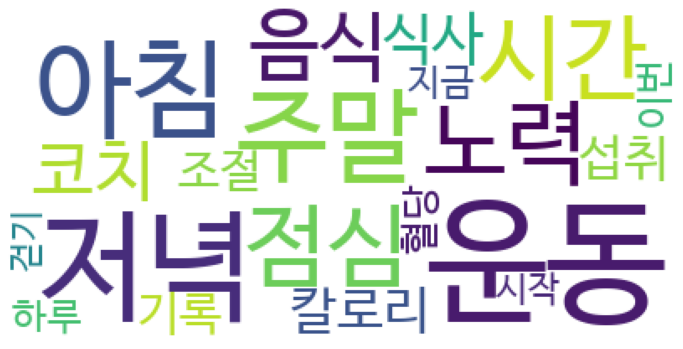

In [ ]:
#워드클라우드 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# 12 워드클라우드 이미지 저장

In [ ]:
#파일로 저장
#cloud.to_file('저장할경로/저장할이름.jpg')
cloud.to_file('/content/drive/MyDrive/메시지 키워드 추출/전체_12주메시지_회원_워드클라우드.jpg')